In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [107]:
data = pd.read_csv("C:\\Program Files (x86)\\python_work\\AI_kursusgange\\Lektion_8\\titanic.csv")

#Fjerner alle 0 værdier, så datasættet er rent
data.dropna()
print(data.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

In [108]:
# Erstat 'Sex' kolonne med numeriske værdier
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})

# Erstat 'Embarked' kolonne med numeriske værdier
data['Embarked'] = data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

print(data.to_string())

     PassengerId  Survived  Pclass                                                                                Name  Sex    Age  SibSp  Parch              Ticket      Fare            Cabin  Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    0  22.00      1      0           A/5 21171    7.2500              NaN       0.0
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1  38.00      1      0            PC 17599   71.2833              C85       1.0
2              3         1       3                                                              Heikkinen, Miss. Laina    1  26.00      0      0    STON/O2. 3101282    7.9250              NaN       0.0
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.00      1      0              113803   53.1000             C123 

C:\Users\alext\AppData\Local\Temp\ipykernel_14600\4112550007.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})
C:\Users\alext\AppData\Local\Temp\ipykernel_14600\4112550007.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] = data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [109]:
#Gør dine features (X) og målvariabel (y) klar
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]  # Funktioner
y = data['Survived']  # Målvariabel

In [110]:
# 5. Del dataene op i trænings- og testdatasæt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# 6. Initialiser og træn en Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
# 7. Forudsig på testdatasættet
y_pred = model.predict(X_test)

In [113]:
# 8. Evaluer modellen
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.8324022346368715
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



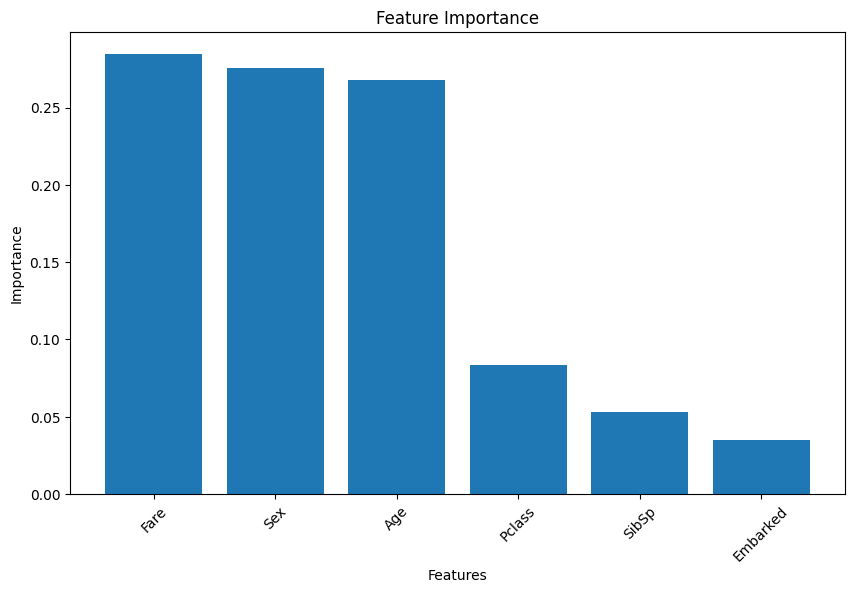

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# 9. Plot Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sortere efter vigtighed

# Plotte feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
